<a href="https://colab.research.google.com/github/afifaniks/TomatoLeafDiseaseDetection/blob/master/Model_Tester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
%tensorflow_version 1.15
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
from keras import backend as K
import keras
from keras.preprocessing import image
import numpy as np
from google.colab import files
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [38]:
img_height = 256
img_width = 256
batch_dim = -1

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_height, img_width)
    batch_dim = 1
else:
    input_shape = (img_height, img_width, 3)

In [39]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, bias_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), bias_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), bias_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), bias_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), bias_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01), activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(axis=batch_dim))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization(axis=batch_dim))
model.add(Dropout(0.2))

model.add(Dense(8))
model.add(Activation(activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 128)      

In [40]:
model.load_weights('plants (2).h5')

In [41]:
preds = []

test_data_dir = 'Test_Dataset'

dirs = sorted(os.listdir(test_data_dir))

for class_index in range(len(dirs)):
  class_path = os.path.join(test_data_dir, dirs[class_index])
  files = sorted(os.listdir(class_path))

  for f in files:
    image_path = os.path.join(class_path, f)
    image_pred = image.load_img(image_path, target_size=(img_height, img_width))

    image_pred = image.img_to_array(image_pred) / 256
    image_pred = np.expand_dims(image_pred, axis=0)

    result = model.predict_classes(image_pred)

    preds.append(result[0])
  
  class_index += 1


In [46]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_height, img_width), class_mode='categorical')

test_generator.class_indices

Found 410 images belonging to 8 classes.


{'Tomato_Bacterial_Spot': 0,
 'Tomato_Early_Blight': 1,
 'Tomato_Healthy': 2,
 'Tomato_Late_Blight': 3,
 'Tomato_Septoria_Leaf_Spot': 4,
 'Tomato_Spider_Mites': 5,
 'Tomato_Target_Spot': 6,
 'Tomato_Yellow_Leaf': 7}

In [52]:
target_names = list(test_generator.class_indices.keys())
target_names

['Tomato_Bacterial_Spot',
 'Tomato_Early_Blight',
 'Tomato_Healthy',
 'Tomato_Late_Blight',
 'Tomato_Septoria_Leaf_Spot',
 'Tomato_Spider_Mites',
 'Tomato_Target_Spot',
 'Tomato_Yellow_Leaf']

In [58]:
con_mat = confusion_matrix(test_generator.classes, preds)

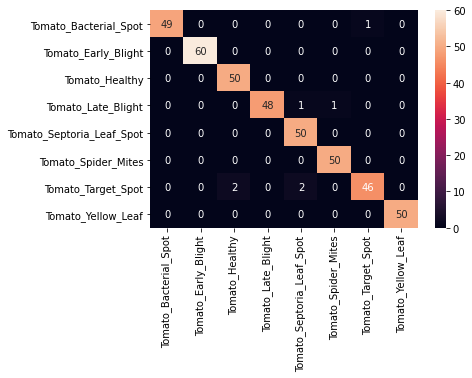

In [62]:
df_cm = pd.DataFrame(con_mat, columns=target_names, index=target_names)
sn.heatmap(df_cm, annot=True)

In [57]:
print(classification_report(test_generator.classes, preds, target_names= target_names))

                           precision    recall  f1-score   support

    Tomato_Bacterial_Spot       1.00      0.98      0.99        50
      Tomato_Early_Blight       1.00      1.00      1.00        60
           Tomato_Healthy       0.96      1.00      0.98        50
       Tomato_Late_Blight       1.00      0.96      0.98        50
Tomato_Septoria_Leaf_Spot       0.94      1.00      0.97        50
      Tomato_Spider_Mites       0.98      1.00      0.99        50
       Tomato_Target_Spot       0.98      0.92      0.95        50
       Tomato_Yellow_Leaf       1.00      1.00      1.00        50

                 accuracy                           0.98       410
                macro avg       0.98      0.98      0.98       410
             weighted avg       0.98      0.98      0.98       410

